In [1]:
import torch
import fastai
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from fastai.data.core import DataLoaders

from fastai.vision.all import *
from fastai.vision.augment import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [2]:
import pandas as pd
csv_path = '../input/census-csv/dataset_cleaned.csv'

In [ ]:
# I have to validate on same dataset only (with a functionality to take subset of dataset), since I have to see training error rate.
# Tried everything from custom dataset to anything else.
# This is the best way around it. Copy the df into df1 (deep=True), and then merge them with valid=True in one of those
# dataframes.
df = pd.read_csv(csv_path)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.groupby('class').apply(lambda x: x.sample(frac=1.))
df = df.reset_index(drop=True)
df = df.sample(frac=1)
df['valid'] = False
df1 = df.copy(deep=True)
df1['valid'] = True
df = pd.concat([df,df1])
df

In [ ]:
def for_kaggle(x):
    temp = '../input/census/'+x.split('../../census/data/')[-1]
    temp = '/'.join(temp.split('\\'))
    return temp

df['path'] = df['path'].apply(lambda x: for_kaggle(x))
df = df.reset_index(drop=True)
df

In [8]:
img_size = 224
augmentations = [
        Rotate(20, p=0.75, mode='bilinear'), 
        Brightness(max_lighting=0.3,p=0.5),
        Contrast(max_lighting=0.4, p=0.5),
        RandomErasing(p=0.3, sl=0.0, sh=0.2, min_aspect=0.3, max_count=1),
        Flip(p=0.2),
        Zoom(max_zoom=1,p=0.5)
    ]
dls = ImageDataLoaders.from_df(df, path='.', valid_col='valid', item_tfms = Resize(img_size), batch_tfms=None, bs=32, num_workers=0)

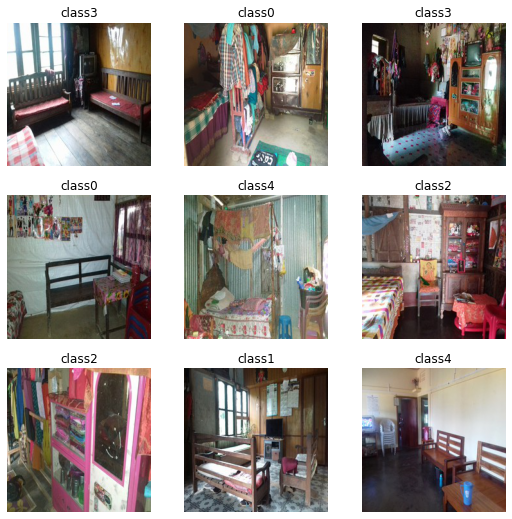

In [9]:
dls.show_batch()

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.freeze()
# learn.lr_find()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit(5, 1e-3)

In [ ]:
learn.fit(5, 1e-6)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

# interp.plot_top_losses(9, figsize=(15,11))

interp.plot_confusion_matrix(figsize=(7, 7), dpi=100)

In [ ]:
interp.plot_top_losses(16, figsize=(15,11))

## Hooks

In [ ]:
# for param in learn.model.parameters():
#     print(param.requires_grad)
learn.model

In [4]:
from fastai.callback import hook
class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
#         self.hook = Hook(m, self.hook_fn)
        self.features = None
        print('Init ', self.hook)
        
    def hook_fn(self, module, input, output): 
        print('Hook_func ' ,self)
        out = output.detach().cpu().numpy()
        print(out.shape)
        if isinstance(self.features, type(None)):
            self.features = out
            print(1)
        else:
            self.features = np.row_stack((self.features, out))
            print(2)
    
    def remove(self): 
        self.hook.remove()

In [11]:
sf = SaveFeatures(learn.model[1][4])

Init  <torch.utils.hooks.RemovableHandle object at 0x7fba71341e90>


In [12]:
preds = learn.get_preds(dl=learn.dls.test_dl(df))

Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
1
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32,

(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71

Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32, 512)
2
Hook_func  <__main__.SaveFeatures object at 0x7fba71341ad0>
(32,

In [13]:
len((sf.features)[0])

512

In [14]:
array = np.array(sf.features).tolist()
df_features = df.copy(deep=True)
df_features['img_repr'] = array
df_features = df_features.reset_index(drop=True)
df_features = df_features[df_features['valid']==False]
del df_features['valid']
df_features

,path,class,img_repr
0,../input/census/HouseInterior/HouseInterior/train/class3/72011_HouseInterior_6_resized.jpg,class3,"[1.1501744985580444, 0.6306066513061523, 0.5631601810455322, -8.319510459899902, -5.796744346618652, 1.1534157991409302, 1.8205302953720093, 2.7598893642425537, 5.083665370941162, -9.75643539428711, 3.2956833839416504, -0.7983589172363281, -7.646296501159668, 0.8158826231956482, -10.179544448852539, -5.5893754959106445, -0.6958739757537842, -2.3131539821624756, 3.7097890377044678, 1.117663860321045, 1.358363151550293, -1.8723548650741577, 0.875321626663208, -4.148826599121094, 10.372303009033203, -4.416451454162598, -2.801008701324463, -8.33074951171875, -5.28145170211792, 4.28957033157348..."
1,../input/census/HouseInterior/HouseInterior/train/class1/38013_HouseInterior_6_resized.jpg,class1,"[3.499856472015381, -0.10636401176452637, -1.8036751747131348, -7.798208713531494, -3.8090858459472656, -1.2013542652130127, -2.320997953414917, 1.6350572109222412, 5.424962043762207, -4.6109514236450195, 3.658226490020752, 1.3002943992614746, -1.5740289688110352, 5.021697998046875, -3.7007601261138916, 0.12819474935531616, 0.2515890598297119, -5.046036720275879, 2.339806318283081, 2.4511566162109375, 1.0708117485046387, -3.9515373706817627, -0.2916816473007202, -6.648553848266602, 9.65627670288086, -6.934863090515137, -1.5037851333618164, -15.281408309936523, -3.8764357566833496, 3.667010..."
2,../input/census/HouseInterior/HouseInterior/train/class1/142001_HouseInterior_6_resized.jpg,class1,"[0.29776453971862793, 1.2638578414916992, 1.2273585796356201, -7.778616428375244, -5.400971412658691, -0.3002697229385376, 1.3504607677459717, 5.046893119812012, 6.715806484222412, -8.487235069274902, 5.614023208618164, -1.7606559991836548, -6.431200981140137, 2.9098076820373535, -6.438808917999268, -0.21572625637054443, 0.8221861124038696, -3.1493587493896484, 6.7918853759765625, -2.5207202434539795, 5.549557685852051, -5.274670124053955, 1.9584122896194458, -9.028945922851562, 9.336009979248047, -4.060112953186035, -3.8874588012695312, -11.912628173828125, -7.263327121734619, 3.843771696..."
3,../input/census/HouseInterior/HouseInterior/train/class2/399011_HouseInterior_6_resized.jpg,class2,"[2.9416422843933105, -1.897580862045288, 0.7651425004005432, -8.16710090637207, -6.282155990600586, -1.4975028038024902, -0.6884896755218506, 4.75100564956665, -0.055520057678222656, -2.7450921535491943, 5.272052764892578, -8.157663345336914, -5.003582954406738, 5.251985549926758, -1.4015700817108154, -1.0656858682632446, -0.5147362351417542, -7.517168045043945, 3.3510944843292236, -0.41782236099243164, -1.697227954864502, -2.161311626434326, 2.8945541381835938, -9.962465286254883, 3.9028427600860596, -4.454288482666016, -2.167855739593506, -21.079944610595703, -7.972190856933594, -6.37068..."
4,../input/census/HouseInterior/HouseInterior/train/class1/388003_HouseInterior_6_resized.jpg,class1,"[2.782284736633301, 1.9647817611694336, -2.7776975631713867, -7.612730026245117, -5.169670104980469, 2.099656581878662, 2.0186209678649902, 4.332376003265381, 1.621556282043457, -6.315452575683594, 3.408108949661255, -8.205039024353027, -5.237541198730469, 3.011085271835327, 0.39941030740737915, -2.724504232406616, 1.0677123069763184, -6.277321815490723, 3.319343090057373, -0.4428766965866089, 5.593417644500732, -1.4425255060195923, 2.301697254180908, -12.615607261657715, 7.5230560302734375, -0.09711194038391113, 0.10882043838500977, -13.125699996948242, -10.764387130737305, -4.93470954895..."
...,...,...,...
4317,../input/census/HouseInterior/HouseInterior/train/class4/1050007_HouseInterior_6_resized.jpg,class4,"[2.9320433139801025, -0.24608755111694336, 2.9065420627593994, -4.361848831176758, -6.960142135620117, -4.67147159576416, -4.387079238891602, 0.24797558784484863, 4.549553394317627, -5.504993438720703, 0.3808932900428772, 0.08643698692321777, -6.5684733390808105, 1.358992338180542, -1.2548582553863525, -0.6090136766433716, 3.4251151084899902,

In [16]:
df_features.to_csv('./dataset_features.csv')

## Image Similarity using Annoy

In [17]:
import ast

# df_features = pd.read_csv('../input/census-csv/dataset_features.csv', index_col=0)
df_features = pd.read_csv('./dataset_features.csv', index_col=0)

# For kaggle (maybe for all)
df_features['img_repr'] = df_features['img_repr'].apply(lambda x: np.array(ast.literal_eval(x), dtype='float16'))
df_features

,path,class,img_repr
0,../input/census/HouseInterior/HouseInterior/train/class3/72011_HouseInterior_6_resized.jpg,class3,"[1.15, 0.6304, 0.563, -8.32, -5.797, 1.153, 1.82, 2.76, 5.082, -9.76, 3.295, -0.7983, -7.645, 0.816, -10.18, -5.59, -0.696, -2.312, 3.709, 1.117, 1.358, -1.872, 0.8755, -4.15, 10.375, -4.418, -2.8, -8.33, -5.28, 4.29, -1.254, -5.29, -2.082, -5.652, -0.4048, 2.326, 4.86, -6.258, 2.838, 2.97, 5.297, 3.047, 3.06, 0.5903, 3.55, -2.676, 4.39, 0.1509, -7.047, 2.365, -4.043, 5.645, 5.395, 0.8105, 3.496, -0.0193, 0.2444, 0.1603, -2.994, -5.73, -7.6, 2.775, 0.708, 5.453, -6.52, -5.945, 3.217, 0.4036, -3.625, 1.254, 3.82, -1.689, -1.675, 6.457, -5.766, -2.604, -1.458, -6.895, -2.088, -6.055, 0.764, ..."
1,../input/census/HouseInterior/HouseInterior/train/class1/38013_HouseInterior_6_resized.jpg,class1,"[3.5, -0.1064, -1.804, -7.797, -3.809, -1.201, -2.32, 1.635, 5.426, -4.61, 3.658, 1.301, -1.574, 5.023, -3.701, 0.1282, 0.2517, -5.047, 2.34, 2.451, 1.071, -3.951, -0.2917, -6.65, 9.66, -6.934, -1.504, -15.28, -3.877, 3.668, 4.82, -5.82, -5.957, -2.523, -1.088, 4.973, 4.895, -2.898, 5.117, 5.637, 2.6, 8.77, 3.45, -3.412, 3.36, 2.13, 2.098, -1.606, -5.68, 1.659, 0.4426, 3.836, 0.2969, 3.893, 3.195, -3.506, 5.047, 4.547, -3.56, -2.164, -7.652, 3.71, 1.23, 7.62, -12.99, -4.64, -1.64, -7.082, -4.95, 3.244, 1.801, 0.277, 4.062, 1.341, -4.617, -1.728, 0.8613, -3.729, -1.476, -8.8, -1.1875, -2.03..."
2,../input/census/HouseInterior/HouseInterior/train/class1/142001_HouseInterior_6_resized.jpg,class1,"[0.2979, 1.264, 1.228, -7.777, -5.402, -0.3003, 1.351, 5.047, 6.715, -8.484, 5.613, -1.761, -6.43, 2.91, -6.438, -0.2157, 0.8223, -3.148, 6.793, -2.521, 5.55, -5.273, 1.958, -9.03, 9.336, -4.06, -3.887, -11.914, -7.26, 3.844, 1.336, -4.7, -5.703, -6.613, -1.468, 0.9917, 1.346, -7.7, 1.17, 4.55, 4.637, 4.49, 3.713, 2.506, 4.066, 1.425, 2.406, -0.665, -6.207, 3.225, -5.363, 4.438, 0.8813, 5.52, 1.158, -5.04, 2.143, 0.2932, 0.1796, -1.176, -13.47, 3.553, 7.527, 7.574, -12.38, -0.559, 6.723, -3.87, -3.23, 4.645, 0.778, -0.7817, 3.057, 1.335, -8.914, -0.7544, -2.266, -6.176, -3.049, -7.094, -1...."
3,../input/census/HouseInterior/HouseInterior/train/class2/399011_HouseInterior_6_resized.jpg,class2,"[2.941, -1.897, 0.765, -8.164, -6.28, -1.497, -0.6885, 4.75, -0.0555, -2.744, 5.273, -8.16, -5.004, 5.254, -1.401, -1.065, -0.5146, -7.516, 3.352, -0.4177, -1.697, -2.162, 2.895, -9.96, 3.902, -4.453, -2.168, -21.08, -7.973, -6.37, 1.959, -8.23, -7.445, -6.35, -3.703, 2.41, 6.293, -2.82, 2.64, 2.787, 6.195, 6.71, 5.855, 5.99, 5.58, -0.708, -1.502, 0.7217, -0.6694, 5.875, -3.777, 6.06, -2.29, 3.318, 7.215, 0.04352, 6.156, 1.189, -4.023, -4.703, -8.9, 1.854, 1.579, 4.375, -11.0, 2.357, 6.13, 0.2363, -3.242, -3.623, 0.4983, -3.043, -3.527, -1.284, -2.834, -0.793, -1.15, -9.92, -2.81, 0.5215, ..."
4,../input/census/HouseInterior/HouseInterior/train/class1/388003_HouseInterior_6_resized.jpg,class1,"[2.783, 1.965, -2.777, -7.613, -5.168, 2.1, 2.02, 4.332, 1.621, -6.316, 3.408, -8.2, -5.24, 3.012, 0.3994, -2.725, 1.067, -6.277, 3.32, -0.4429, 5.594, -1.442, 2.3, -12.62, 7.523, -0.0971, 0.1088, -13.125, -10.766, -4.934, -0.9385, -3.477, -6.453, -3.775, -0.843, 2.54, -0.3157, -4.348, 4.277, 0.755, 7.113, 5.805, 5.555, 8.68, 3.96, -3.592, -1.454, -0.5615, -4.746, 1.191, -3.61, 4.26, 0.523, 2.945, 4.793, 1.382, 7.07, -1.851, -2.256, -2.014, -10.85, 6.234, 1.69, 3.295, -7.152, -3.275, 4.996, -1.793, 0.3594, 3.172, 1.123, 1.85, 2.287, -0.1036, -3.43, -3.398, -1.908, -10.8, -2.496, -1.907, 0...."
...,...,...,...
4317,../input/census/HouseInterior/HouseInterior/train/class4/1050007_HouseInterior_6_resized.jpg,class4,"[2.932, -0.2461, 2.906, -4.363, -6.96, -4.67, -4.387, 0.2479, 4.55, -5.504, 0.3809, 0.0864, -6.57, 1.359, -1.255, -0.609, 3.426, -9.18, 5.152, 1.87, 1.122, -0.851, 0.7573, -4.97, 7.652, -7.25, -1.868, -11.195, -3.006, 6.8, 0.5854, -4.242, -3.049, -1.861, -4.594, 4.668, 8.76, -6.223, -0.1675, -3.535, 5.246, 5.375, 5.996, -1.458, 4.883, -1.886,

In [ ]:
from annoy import AnnoyIndex

In [ ]:
f = len(df_features['img_repr'][0])
t = AnnoyIndex(f, metric='euclidean')

In [ ]:
# np.array(ast.literal_eval(df_features['img_repr'][0]), dtype='float16')

# df_features
len(df_features['img_repr'][0])

In [ ]:
ntree = 50

for i, vector in enumerate(df_features['img_repr']):
    t.add_item(i, vector)
_  = t.build(ntree)

In [ ]:
import time
def get_similar_images_annoy(img_index):
    start = time.time()
    base_img_id, base_vector, base_label  = df_features.iloc[img_index, [0, 2, 1]]
    similar_img_ids = t.get_nns_by_item(img_index, 8)
    end = time.time()
    print(f'{(end - start) * 1000} ms')
    return base_img_id, base_label, df_features.iloc[similar_img_ids]

In [ ]:
base_image, base_label, similar_images_df = get_similar_images_annoy(0)

In [ ]:
print(base_label)
im = Image.open(base_image)
im

In [ ]:
similar_images_df

In [ ]:
files = similar_images_df['path'].tolist()
len(files)

In [ ]:
import PIL
rows = 2

for num, x in enumerate(files):
    img = PIL.Image.open(x)
    plt.subplot(2,4,num+1)
    plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img, aspect='auto')

## Checking pairwise similarity

In [ ]:
duplicate_paths = {}
for i, row in df_features.iterrows():
    if(df_features['path'][i] in duplicate_paths):
        continue
    for j, row in df_features.iterrows():
        if(i<j and df_features['img_repr'][i]==df_features['img_repr'][j]):
            print(i, j, df_features['path'][i], df_features['path'][j])
            duplicate_paths[(df_features['path'][j])] = 1

In [ ]:
temp = ['../input/census/HouseInterior/train/class3/15011_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/1030004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/112004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/1036004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/317013_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/1022004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/126014_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/138001_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/124005_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/4001_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/124002_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/20004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/128013_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/96013_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/122008_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/44014_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/212003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/30005_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/147005_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/112005_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/106004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/331001_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/4007_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/15002_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/15010_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/78003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/373014_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/325001_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/147004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/134012_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/106013_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/331008_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/124004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/114008_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/13007_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/156004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/15007_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/265012_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/12012_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/331004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/25005_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/124006_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/326012_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/22002_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/1001008_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/109001_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/15006_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/317005_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/15004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/61012_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/181007_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/181001_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/10007_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/26013_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/129009_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/69003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/42005_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/124012_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/106009_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/129008_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/129012_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/42003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/25003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/28006_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/1015001_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/10003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/331007_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/30003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/124011_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/10006_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/82008_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/39008_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/147001_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/124007_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/1030002_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/146004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/56005_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/36003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/148008_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/116011_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/447002_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/406004_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/437001_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/20003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/317009_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/106008_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class2/106012_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class3/1022003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/148005_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/46006_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/447006_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/323003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/24013_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class4/128008_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class1/447003_HouseInterior_6_resized.jpg','../input/census/HouseInterior/train/class0/1030001_HouseInterior_6_resized.jpg']
duplicate_paths = {}
for i in temp:
    duplicate_paths[i] = 1
duplicate_paths

In [ ]:
len(duplicate_paths)

Removing duplicates

In [ ]:
duplicate_paths = []
f = open('../input/census-csv/duplicates.txt', 'r')
for fd in f:
#     print(fd)
    duplicate_paths.append(fd.strip())

In [ ]:
dups_map = {}
for i in duplicate_paths:
    dups_map[i] = False

In [ ]:
dups_map

In [ ]:
from tqdm import tqdm

for i,row in tqdm(df.iterrows()):
    if row['path'] in dups_map:
        df = df.drop([i])
#         dups_map[row['path']] = True

In [ ]:
# removed duplicates now
df

In [3]:
# df.to_csv('./cleaned_df_train_overfit.csv')
df = pd.read_csv('../input/census-csv/cleaned_df_train_overfit.csv', index_col=0)
df

,path,class,valid
0,../input/census/HouseInterior/train/class3/72011_HouseInterior_6_resized.jpg,class3,False
2,../input/census/HouseInterior/train/class1/38013_HouseInterior_6_resized.jpg,class1,False
3,../input/census/HouseInterior/train/class1/142001_HouseInterior_6_resized.jpg,class1,False
4,../input/census/HouseInterior/train/class2/399011_HouseInterior_6_resized.jpg,class2,False
5,../input/census/HouseInterior/train/class1/388003_HouseInterior_6_resized.jpg,class1,False
...,...,...,...
8927,../input/census/HouseInterior/train/class4/1050007_HouseInterior_6_resized.jpg,class4,True
8928,../input/census/HouseInterior/train/class0/1015003_HouseInterior_6_resized.jpg,class0,True
8929,../input/census/HouseInterior/train/class0/1060011_HouseInterior_6_resized.jpg,class0,True
8930,../input/census/HouseInterior/train/class3/30001_HouseInterior_6_resized.jpg,class3,True


# Training again after modifying df

In [ ]:
dls = ImageDataLoaders.from_df(df, path='.', valid_col='valid', item_tfms = Resize(224), batch_tfms=None, bs=32, num_workers=0)
learn_new = cnn_learner(dls, resnet34, metrics=error_rate)
# learn_new.freeze()
learn_new.lr_find()

In [ ]:
learn_new.fit(10,2e-4)

In [ ]:
learn_new.fit(5,2e-6)

In [ ]:
interp_new = ClassificationInterpretation.from_learner(learn_new)

losses,idxs = interp_new.top_losses()

interp_new.plot_confusion_matrix(figsize=(7, 7), dpi=100)

In [ ]:
interp_new.plot_top_losses(8, figsize=(15,11))

## TSNE

In [18]:
from sklearn.manifold import TSNE

img_repr_matrix = [list(x) for x in df_features['img_repr'].values]
tsne = TSNE(n_components=3, verbose=10, init='pca', perplexity=30, n_iter=500, n_iter_without_progress=100)
tsne_results_3 = tsne.fit_transform(img_repr_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4322 samples in 0.619s...
[t-SNE] Computed neighbors for 4322 samples in 24.427s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4322
[t-SNE] Computed conditional probabilities for sample 2000 / 4322
[t-SNE] Computed conditional probabilities for sample 3000 / 4322
[t-SNE] Computed conditional probabilities for sample 4000 / 4322
[t-SNE] Computed conditional probabilities for sample 4322 / 4322
[t-SNE] Mean sigma: 12.017963
[t-SNE] Computed conditional probabilities in 0.348s
[t-SNE] Iteration 50: error = 93.6133194, gradient norm = 0.0528923 (50 iterations in 14.707s)
[t-SNE] Iteration 100: error = 93.6573257, gradient norm = 0.0589549 (50 iterations in 10.825s)
[t-SNE] Iteration 150: error = 92.4375763, gradient norm = 0.0698290 (50 iterations in 9.925s)
[t-SNE] Iteration 200: error = 91.3235931, gradient norm = 0.0480410 (50 iterations in 10.195s)
[t-SNE] Iteration 250: error = 90.2703247, gradient norm = 0.03

In [19]:
df_features['tsne1'] = tsne_results_3[:,0]
df_features['tsne2'] = tsne_results_3[:,1]
df_features['tsne3'] = tsne_results_3[:,2]

In [ ]:
df_features

In [20]:
df_features.to_parquet('similar_images')

ArrowNotImplementedError: Unhandled type for Arrow to Parquet schema conversion: halffloat

In [23]:
import plotly_express as px
px.scatter_3d(df_features.loc[df_features['class'].isin(['class0', 'class3'])], x='tsne1', y='tsne2', z='tsne3', color='class')

In [24]:
px.scatter_3d(df_features.loc[df_features['class'].isin(['class0', 'class4'])], x='tsne1', y='tsne2', z='tsne3', color='class')

In [25]:
px.scatter_3d(df_features.loc[df_features['class'].isin(['class0', 'class1', 'class2', 'class3', 'class4'])], x='tsne1', y='tsne2', z='tsne3', color='class')

## Real classification on modified df

In [7]:
df = df.loc[df['valid']==False]
del df['valid']
df['path'] = df['path'].apply(lambda x: '../input/census/HouseInterior'+x.split('../input/census')[-1])
df

,path,class,valid
0,../input/census/HouseInterior/HouseInterior/train/class3/72011_HouseInterior_6_resized.jpg,class3,False
2,../input/census/HouseInterior/HouseInterior/train/class1/38013_HouseInterior_6_resized.jpg,class1,False
3,../input/census/HouseInterior/HouseInterior/train/class1/142001_HouseInterior_6_resized.jpg,class1,False
4,../input/census/HouseInterior/HouseInterior/train/class2/399011_HouseInterior_6_resized.jpg,class2,False
5,../input/census/HouseInterior/HouseInterior/train/class1/388003_HouseInterior_6_resized.jpg,class1,False
...,...,...,...
8927,../input/census/HouseInterior/HouseInterior/train/class4/1050007_HouseInterior_6_resized.jpg,class4,True
8928,../input/census/HouseInterior/HouseInterior/train/class0/1015003_HouseInterior_6_resized.jpg,class0,True
8929,../input/census/HouseInterior/HouseInterior/train/class0/1060011_HouseInterior_6_resized.jpg,class0,True
8930,../input/census/HouseInterior/HouseInterior/train/class3/30001_HouseInterior_6_resized.jpg,class3,True


In [ ]:
df_test = df.sample(frac=0.2)
df = df.drop(df_test.index)

In [ ]:
df

In [ ]:
df_test

In [ ]:
df['class'].value_counts(normalize=True)

In [ ]:
# temp = df.loc[df['class'].isin(['class1', 'class4'])].copy(deep=True)
# temp['class'].value_counts(normalize=False)

In [ ]:
def create_learner(df, img_size=224, bs=32, augmentations=None, model=resnet34, show_loss=True, start_lr=5e-4, epochs=10):
    if(augmentations is None):
        augmentations = [
            Brightness(max_lighting=0.3,p=0.2),
            Contrast(max_lighting=0.4, p=0.2)
        ]
    dls = ImageDataLoaders.from_df(df, path='.', item_tfms = Resize(img_size), batch_tfms=augmentations, bs=bs, valid_pct=0.2, num_workers=0)
    if(show_loss==True):
        learn = cnn_learner(dls, model, metrics=[accuracy,error_rate]).to_fp16()
    else:
        learn = cnn_learner(dls, model, metrics=[error_rate]).to_fp16()
    temp_lr = start_lr
    for i in range(3):
        lr = temp_lr/(10^i)
        learn.fit_one_cycle(epochs//3,lr)
    return learn

In [ ]:
learners = []

bs_list = [8,16,32,64,128]
bs_list = [8,32,128]
start_lr = [3e-3,4e-4,4e-5]
models = [resnet34, densenet121, alexnet]

learners = [create_learner(df, bs=i, start_lr=j, model=k) for i in bs_list for j in start_lr for k in models]

In [ ]:
learners[0].print

In [ ]:
a = list(range(10)); b=list(range(20)); c = list(range(3))
# print(a)
# print(b)
([(i,j,k) for i in a for j in b for k in c])

In [ ]:
from tqdm import tqdm
for i in tqdm(range(27)):
    learners[i].save('./'+str(i))
# learners[0].save('./0.pth')
# !ls ../output

In [ ]:
for i in range(5,10):
    learners[i].recorder.plot_loss()

In [ ]:
len(learners)

In [ ]:
def maxfreq(lst):
#     dic = {}
#     for i in lst:
#         if i not in dic:
#             dic[i]=1
#         else:
#             dic[i]+=1
#     maxfreq = -1
#     elem = 0
#     for i in dic:
#         if(dic[i]>maxfreq):
#             maxfreq = dic[i]
#             elem = i
#     return elem
    return max(set(lst), key=lst.count)

In [ ]:
maxfreq([1,2,2,2,2,3,3,3,3,3,51,123])

In [ ]:
cf_matrix = np.zeros(shape=(5,5))

for i,row in (df_test.iterrows()):
    scores = [int(x.predict(row['path'])[1]) for x in learners]
    cf_matrix[int(row['class'][-1])][maxfreq(scores)] += 1
    print(cf_matrix)

In [ ]:
cf_matrix

In [ ]:
(57+53+26+46+90)/(sum(sum(cf_matrix)))

==


In [ ]:
img_size = 224
augmentations = [
#         Rotate(20, p=0.55, mode='bilinear'), 
        Brightness(max_lighting=0.3,p=0.2),
        Contrast(max_lighting=0.4, p=0.2),
#         RandomErasing(p=0.3, sl=0.0, sh=0.2, min_aspect=0.3, max_count=1),
#         Flip(p=0.2),
#         Zoom(max_zoom=1,p=0.5)
    ]
dls = ImageDataLoaders.from_df(df, path='.', item_tfms = Resize(img_size), batch_tfms=augmentations, bs=64, valid_pct=0.2, num_workers=0)
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy,error_rate])
# learn.unfreeze()
learn.lr_find()

In [ ]:
# learn = cnn_learner(dls, resnet34, metrics=[accuracy,error_rate])
learn.fit_one_cycle(5,2e-3)

In [ ]:
learn.unfreeze()
learn.fit(10,1e-6)

In [ ]:
learn.recorder.plot_loss()

In [ ]:
interp_new = ClassificationInterpretation.from_learner(learners[0])

losses,idxs = interp_new.top_losses()

interp_new.plot_confusion_matrix(figsize=(7, 7), dpi=100)

In [ ]:
interp_new.plot_top_losses(12, figsize=(15,11))

In [ ]:
interp_new.print_classification_report()

In [ ]:
# loss and ids(in df) of top loss images
losses, idxs = interp_new.top_losses(10)

In [ ]:
idxs,losses

In [ ]:
# dls.valid_ds.items will return the shuffled df
[dls.valid_ds.items.iloc[int(i)] for i in idxs]

In [ ]:
2+2